# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [39]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2024-11-12 21:05:33--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2024-11-12 21:05:34--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv.2’

Gender_bias

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [40]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [41]:
import pandas as pd

texto= pd.read_csv("Gender_bias_spanish.csv")

## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [42]:
texto.head(10)

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
5,yo solo quiero a alguien que odie a7x conmigo,non-biased
6,mi mamá cumple años hoy. y este es uno de los ...,non-biased
7,@pvaya @sailor_tesserei @sh3rrymh es que es un...,non-biased
8,#eneneroyo estaré más al pendiente de mi famil...,non-biased
9,@yolanday_y @el_pais tras 72.000 años de viaje...,non-biased


In [43]:
# Resumen del conjunto de datos
texto.info()
# Contar la cantidad de tweets por etiqueta
texto["Label"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


,count
Label,
non-biased,1596
biased,318


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

In [44]:
tipos=texto["Label"].value_counts()
proporcion=tipos/len(texto)
proporcion

,count
Label,
non-biased,0.833856
biased,0.166144


**RTA**  En teoría, el 83% de los tweets son imparciales, lo que quiere decir que las personas a la hora de expresas sus opiniones no se inclinan hacia una postura en si, sino que hablan de manera racional y formal. En cambio el 16% tiene posturas sesgadas, hablando de diversos temas con una postura en específico. Sus afirmaciones pueden ser más emocionales e informales que racionales.

También, la cantidad de datos por etiqueta está muy desproporcional, lo cual podría afectar el análisis ya que la mayoría de los tweets son imparciales en esta base de datos. Las palabras que emplean aquellos que hicieron tweets imparciales pueden tener variaciones respecto a aquellos que hicieron tweets sesgados.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [45]:
# Cree una funcion limpiar texto
# Aplicar la limpieza de texto

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [46]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)
texto['word_counts'] = texto['Contents'].apply(contar_palabras)

In [47]:
biased_word_counts = texto[texto['Label'] == 'biased']['word_counts'].sum()
non_biased_word_counts = texto[texto['Label'] == 'non-biased']['word_counts'].sum()

biased_df = pd.DataFrame(biased_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
non_biased_df = pd.DataFrame(non_biased_word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

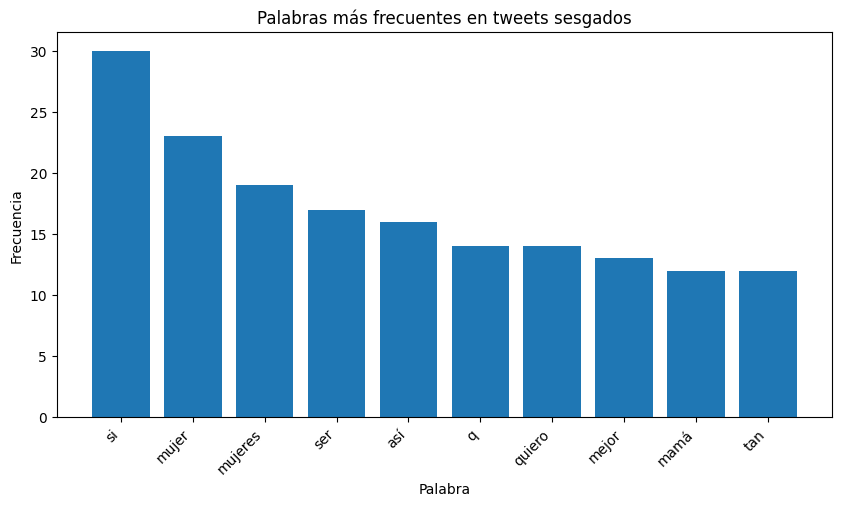

In [48]:
import matplotlib.pyplot as plt

top_biased_words = biased_df.head(10)  # Get the top 10 words
plt.figure(figsize=(10, 5))
plt.bar(top_biased_words['Word'], top_biased_words['Count'])
plt.title('Palabras más frecuentes en tweets sesgados')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

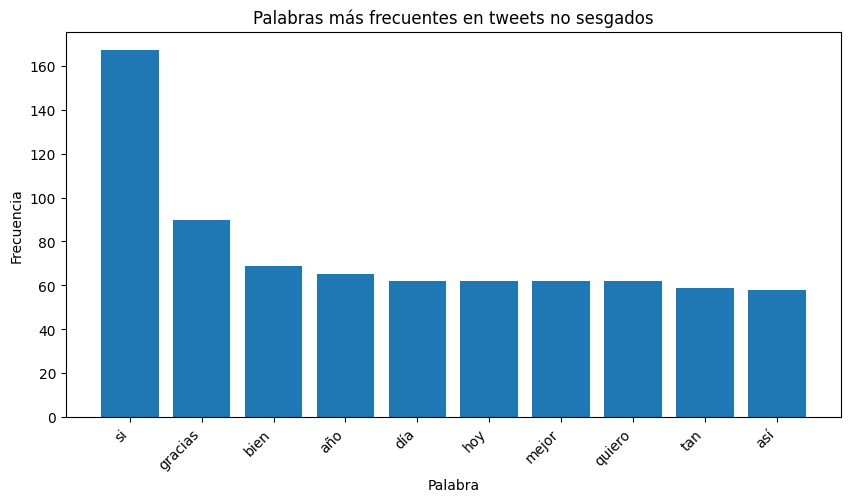

In [49]:
top_non_biased_words = non_biased_df.head(10)  # Get the top 10 words
plt.figure(figsize=(10, 5))
plt.bar(top_non_biased_words['Word'], top_non_biased_words['Count'])
plt.title('Palabras más frecuentes en tweets no sesgados')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

**RTA** Las palabras más usadas en los biased tweets en comparación con los non biased son "ser, q, mujer, mujeres".Las empresas pueden entender mejor las opiniones sesgadas con que contengan estas palabras. Se hacen tweets con sesgos respecto al género, también estos tweets hablar más del ser, lo que permite entender se tiene una postura en específico respecto a eso y el "q" sirve como referencia para afirmar que los tweets sesgados se escriben con un vocabulario más informal. Esto también sirve para entender lo que sienten y piensan los consumidores y ajustar sus estrategias de comunicación.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [50]:
from textblob import TextBlob

def analizar_sentimiento(texto):

    if isinstance(texto, str):
        blob = TextBlob(texto)
        return blob.sentiment.polarity
    else:
        return None  # En caso de que el texto no sea una cadena, devolvemos None

texto['sentimiento'] = texto['Contents'].apply(analizar_sentimiento)

# Ver el resultado
print(texto[['Contents', 'sentimiento']])

                                               Contents  sentimiento
0     @chumeltorres ya cabrón! sin tí se reciben las...          0.0
1     ¿alguien es tan amable de ir a hacerme la comp...          0.0
2     @jenniferduquee hahaha, si está rico, nadamas ...          0.2
3     @evagelcot donde lo ves!!? es mi programa favo...          0.0
4     como siempre mi tortilla triunfa mas que otros...          0.0
...                                                 ...          ...
1909  iba a ir a dash pero mis 3 cortadas, mi color ...          0.0
1910  que pinche chiste tiene estar medio alto si to...          0.0
1911  si fuera bien idiota. ya hubiera comprado un a...          0.0
1912  nota mental: no le quieras ayudar a alguien qu...         -0.1
1913  vamos @arvenlol, dales duro como tú sabes  #lo...          0.0

[1914 rows x 2 columns]


<ipython-input-51-def73faefff7>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(biased_df['sentimiento'], shade=True, label='biased', color='red')
<ipython-input-51-def73faefff7>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_biased_df['sentimiento'], shade=True, label='non-biased', color='blue')


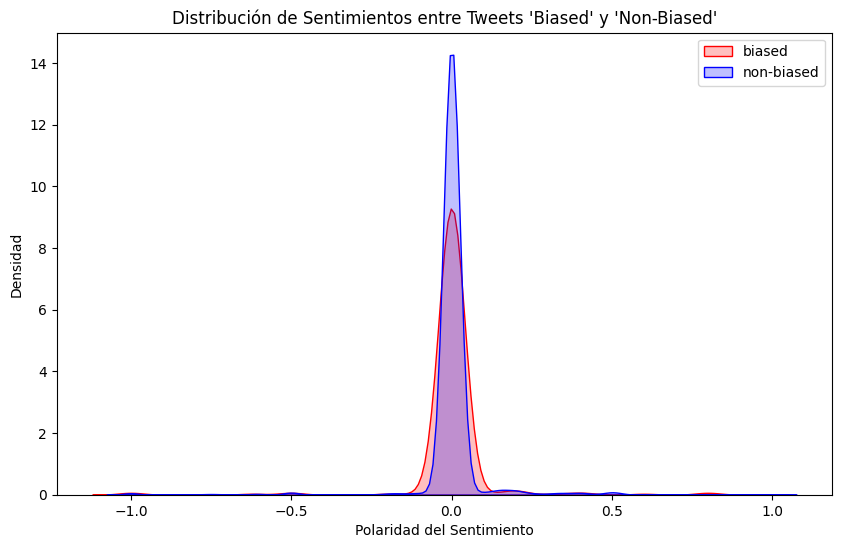

In [51]:
import seaborn as sns
biased_df = texto[texto['Label'] == 'biased']
non_biased_df = texto[texto['Label'] == 'non-biased']

plt.figure(figsize=(10, 6))

sns.kdeplot(biased_df['sentimiento'], shade=True, label='biased', color='red')
sns.kdeplot(non_biased_df['sentimiento'], shade=True, label='non-biased', color='blue')

plt.title("Distribución de Sentimientos entre Tweets 'Biased' y 'Non-Biased'")
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Densidad')
plt.legend()
plt.show()

**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

*¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?*

**RTA**: Se puede identificar que los tweets imparciales tienden a tener sentimientos más neutrales respecto a los tweets sesgados.
Del mismo modo, tiende a haber una cantidad de mayor de tweets sesgados con emociones positivas o negativas, a diferencia de los tweets imparciales.

*¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?*

**RTA**: Indica que los tweets sesgados se tienden a escribir más en un momento emocional o se escriben pensando en las emociones que generan un tema y no desde la neutralidad "cabeza fría".


*¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?*

**RTA**: Se puede hacer un filtro para recolectar tweets de el tema en estudio, después hacer la limpieza de datos, seguidamente hacer el conteo de palabras para identificar patrones y después aplicar el análisis de sentimientos. Con diagramas de densidad se puede ver de forma más gráfica que piensan las personas sobre ese tema y tomar las medidas correspondientes dependiendo de los objetivos del estudio.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
## Cree una funcion para geenrar nube de palabras
texto['cleaned_Contents'] = texto['Contents'].apply(limpiar_texto)

In [54]:
def generar_nube_palabras(texto):
    # Unir todas las listas de palabras limpias en un solo string
    palabras = ' '.join([palabra for lista in texto for palabra in lista])  # Aplanamos la lista de listas
    # Generamos la nube de palabras
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    # Mostramos la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')  # No mostrar los ejes
    plt.show()

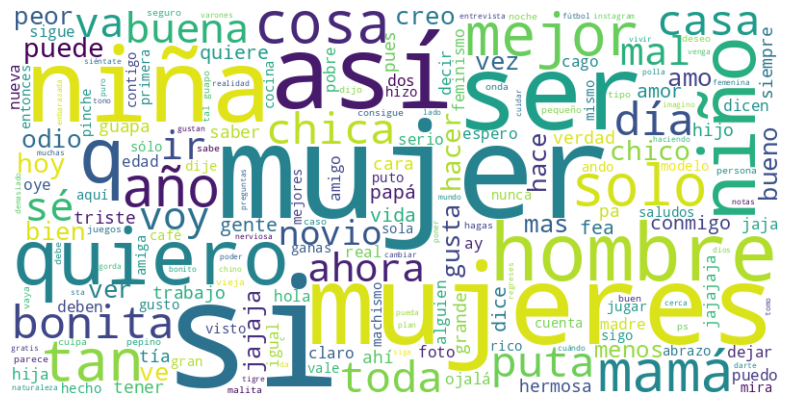

In [55]:
# Biased nube de palabras
biased_texts = texto[texto['Label'] == 'biased']['cleaned_Contents']
generar_nube_palabras(biased_texts)

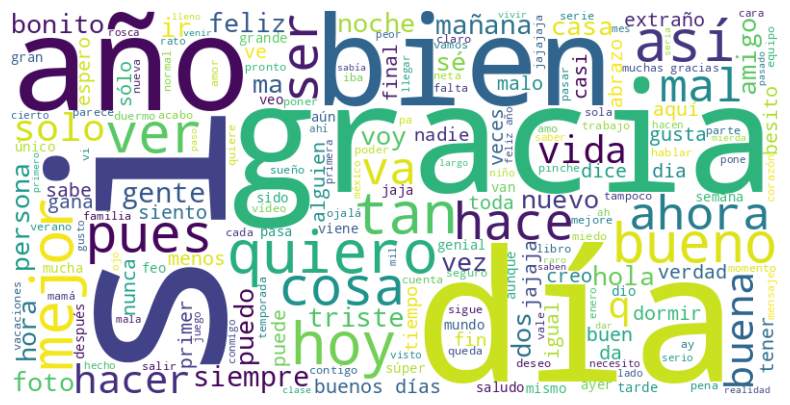

In [56]:
# non biased nube de palabras
non_biased_texts = texto[texto['Label'] == 'non-biased']['cleaned_Contents']
generar_nube_palabras(non_biased_texts)

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

*¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?*

**RTA:** A través de este análisis, la marca aprende el tipo de lenguaje que usa el público objetivo, así mismo puede identificar los deseos que tengan los consumidores (y que la marca pueda satisfacer), también puede reconocer que se dice de la marca y los sentimientos que genera en las personas.

*¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?*

**RTA:** Se debe identificar que quiere transmitir el público con sus tweets y dirigir la campaña de tal manera que se logren reafirmar los comentarios positivos hacia la marca o contrarestar los comentarios negativos. También la marca puede tomar diversas posturas para que de alguna forma la marca se conecte con el público de acuerdo a sus opiniones.

*¿Qué patrones importantes se podrían explorar en un análisis futuro?*

**RTA:** Se puede identificar el impacto de los comentarios en redes sobre la marca, también identificar tendencias para innovar productos y realizar segmentaciones para saber hacia que segmento de internet se quiere dirigir la marca.